# Term Project DSC540 Data Preperation

# Milestone 2

### Exploring Housing Data Flat File

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# read .tsv file using read_csv() function
df = pd.read_csv('city_market_tracker.tsv000', sep = '\t')

In [3]:
# reviewing first 5 rows
df.head(5)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2021-02-01,2021-02-28,30,place,6,5779,f,"Fair Lawn, NJ",Fair Lawn,New Jersey,...,-0.142857,0.086957,-0.072464,0.039787,0.214286,0.109023,-0.058442,"New York, NY",35614,2024-03-10 14:36:40
1,2019-04-01,2019-04-30,30,place,6,6504,f,"Elyria, OH",Elyria,Ohio,...,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,"Cleveland, OH",17460,2024-03-10 14:36:40
2,2020-08-01,2020-08-31,30,place,6,24459,f,"Northwest Harwich, MA",Northwest Harwich,Massachusetts,...,-0.484848,0.285714,-0.098901,0.007937,0.500000,0.428571,0.500000,"Barnstable Town, MA",12700,2024-03-10 14:36:40
3,2018-11-01,2018-11-30,30,place,6,35672,f,"Mannford, OK",Mannford,Oklahoma,...,0.333333,0.200000,-0.175000,0.133333,0.800000,0.800000,0.800000,"Tulsa, OK",46140,2024-03-10 14:36:40
4,2013-02-01,2013-02-28,30,place,6,22064,f,"Claryville, KY",Claryville,Kentucky,...,0.250000,NaN,NaN,NaN,0.333333,NaN,-0.666667,"Cincinnati, OH",17140,2024-03-10 14:36:40


In [4]:
# exploring dataframe columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245047 entries, 0 to 5245046
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   period_begin                    object 
 1   period_end                      object 
 2   period_duration                 int64  
 3   region_type                     object 
 4   region_type_id                  int64  
 5   table_id                        int64  
 6   is_seasonally_adjusted          object 
 7   region                          object 
 8   city                            object 
 9   state                           object 
 10  state_code                      object 
 11  property_type                   object 
 12  property_type_id                int64  
 13  median_sale_price               float64
 14  median_sale_price_mom           float64
 15  median_sale_price_yoy           float64
 16  median_list_price               float64
 17  median_list_price_mom      

### Cleaning and Formatting Step One

**For step one of the data transformations I will drop columns that I deem not necessary for the analysis project. My main focus of the project is to focus on the area I intend on moving to which is specifically Charlotte, NC. I may consider a wider area, and look perhaps at the whole of North Carolina.** 

In [5]:
# dropping columns with index values
df.drop(df.columns[[3, 6, 18]], axis=1, inplace=True)

In [6]:
# checking first 5 rows
df.head(5)

,period_begin,period_end,period_duration,region_type_id,table_id,region,city,state,state_code,property_type,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2021-02-01,2021-02-28,30,6,5779,"Fair Lawn, NJ",Fair Lawn,New Jersey,NJ,Single Family Residential,...,-0.142857,0.086957,-0.072464,0.039787,0.214286,0.109023,-0.058442,"New York, NY",35614,2024-03-10 14:36:40
1,2019-04-01,2019-04-30,30,6,6504,"Elyria, OH",Elyria,Ohio,OH,Multi-Family (2-4 Unit),...,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,"Cleveland, OH",17460,2024-03-10 14:36:40
2,2020-08-01,2020-08-31,30,6,24459,"Northwest Harwich, MA",Northwest Harwich,Massachusetts,MA,Single Family Residential,...,-0.484848,0.285714,-0.098901,0.007937,0.500000,0.428571,0.500000,"Barnstable Town, MA",12700,2024-03-10 14:36:40
3,2018-11-01,2018-11-30,30,6,35672,"Mannford, OK",Mannford,Oklahoma,OK,Single Family Residential,...,0.333333,0.200000,-0.175000,0.133333,0.800000,0.800000,0.800000,"Tulsa, OK",46140,2024-03-10 14:36:40
4,2013-02-01,2013-02-28,30,6,22064,"Claryville, KY",Claryville,Kentucky,KY,Single Family Residential,...,0.250000,NaN,NaN,NaN,0.333333,NaN,-0.666667,"Cincinnati, OH",17140,2024-03-10 14:36:40


In [7]:
# dropping columns using name, must assign to df again
df = df.drop(['region_type_id', 'table_id'], axis=1)

In [8]:
# checking shape of dataframe 
df.shape

(5245047, 53)

### Cleaning and Formatting Step Two

**In step two of the data transformations I will be filtering the dataframe to only include Charlotte,NC (or possibly the state of North Carolina).** 

In [9]:
# filtering by state
nc_df = df[df['state'] == 'North Carolina'] 

In [10]:
# viewing first 5 rows
nc_df.head(5)

,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,median_sale_price,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
52,2019-10-01,2019-10-31,30,"Bostic, NC",Bostic,North Carolina,NC,All Residential,-1,218000.0,...,0.000000,0.375,NaN,0.284091,NaN,NaN,NaN,"Forest City, NC",22580,2024-03-10 14:36:40
123,2013-05-01,2013-05-31,30,"La Grange, NC",La Grange,North Carolina,NC,All Residential,-1,177550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kinston, NC",28820,2024-03-10 14:36:40
134,2013-01-01,2013-01-31,30,"Ayden, NC",Ayden,North Carolina,NC,Single Family Residential,6,120950.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Greenville, NC",24780,2024-03-10 14:36:40
146,2020-10-01,2020-10-31,30,"Beaufort, NC",Beaufort,North Carolina,NC,Single Family Residential,6,368400.0,...,-0.092857,NaN,NaN,NaN,0.0,-0.111111,-0.25,"Morehead City, NC",33980,2024-03-10 14:36:40
207,2020-01-01,2020-01-31,30,"Montreat, NC",Montreat,North Carolina,NC,All Residential,-1,345000.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"Asheville, NC",11700,2024-03-10 14:36:40


In [11]:
# further filter to a specific 'city' of choice
char_df = nc_df[nc_df['city'] == 'Charlotte'] 
char_df.head(10)

,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,median_sale_price,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
252298,2021-07-01,2021-07-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,357000.0,...,0.279009,0.193569,0.035709,0.040362,0.439216,-0.015503,0.127649,"Charlotte, NC",16740,2024-03-10 14:36:40
370324,2013-05-01,2013-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,All Residential,-1,175000.0,...,NaN,0.130988,0.017814,NaN,0.068132,0.018627,NaN,"Charlotte, NC",16740,2024-03-10 14:36:40
558147,2016-05-01,2016-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,202000.0,...,0.064268,0.134222,0.019793,-0.009692,0.034351,0.004211,0.002805,"Charlotte, NC",16740,2024-03-10 14:36:40
702829,2018-11-01,2018-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,All Residential,-1,230000.0,...,-0.041204,0.207420,-0.035568,0.076162,0.184152,-0.023730,0.139009,"Charlotte, NC",16740,2024-03-10 14:36:40
865075,2019-07-01,2019-07-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Condo/Co-op,3,200000.0,...,0.015686,0.163793,-0.108002,-0.009617,0.290323,0.290323,0.136476,"Charlotte, NC",16740,2024-03-10 14:36:40
890984,2023-05-01,2023-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,357500.0,...,-0.277778,0.375000,0.241667,NaN,0.285714,0.085714,-0.259740,"Charlotte, NC",16740,2024-03-10 14:36:40
918500,2020-11-01,2020-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,307000.0,...,0.227302,0.152333,-0.035874,-0.033388,0.265180,-0.068154,0.088096,"Charlotte, NC",16740,2024-03-10 14:36:40
1079398,2020-02-01,2020-02-29,30,"Charlotte, NC",Charlotte,North Carolina,NC,Condo/Co-op,3,195000.0,...,0.100667,0.134211,-0.081259,0.055779,0.242424,-0.013131,-0.090909,"Charlotte, NC",16740,2024-03-10 14:36:40
1106955,2014-08-01,2014-08-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,181100.0,...,-0.020527,0.169706,-0.024207,0.028855,0.038136,0.005099,-0.003859,"Charlotte, NC",16740,2024-03-10 14:36:40
1203165,2013-11-01,2013-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,77000.0,...,NaN,0.083333,-0.013441,NaN,0.000000,-0.400000,NaN,"Charlotte, NC",16740,2024-03-10 14:36:40


### Cleaning and Formatting Step Three

**In step three of the data transformations I will be reviewing the NaN values and determining if they need to be replaced or if addtional columns can be dropped.**

In [12]:
# checking shape of the new data frame
char_df.shape

(664, 53)

In [13]:
# viewing how many total NaN values there are per column using .sum() and .isna() functions
nan_count = char_df.isna().sum()
nan_count

period_begin                        0
period_end                          0
period_duration                     0
region                              0
city                                0
state                               0
state_code                          0
property_type                       0
property_type_id                    0
median_sale_price                   0
median_sale_price_mom               6
median_sale_price_yoy              61
median_list_price                   0
median_list_price_mom               6
median_ppsf                         0
median_ppsf_mom                     6
median_ppsf_yoy                    61
median_list_ppsf                    0
median_list_ppsf_mom                6
median_list_ppsf_yoy               61
homes_sold                          0
homes_sold_mom                      6
homes_sold_yoy                     61
pending_sales                     664
pending_sales_mom                 664
pending_sales_yoy                 664
new_listings

In [14]:
# dropping rows with NaN values
# char_df.dropna()

**After running the above code and getting an empty dataframe back I realized that the 'pending' sales column has the exact number of NaN values as the rows of the dataframe. This lead me to think that every row was being removed because every row had NaN values, which after some time makes complete sense. This leads me to my next step of dropping additional columns. The columns selected should have no impact on the current analysis as they are pending sales.** 

In [15]:
char_df = char_df.drop(['pending_sales', 'pending_sales_mom','pending_sales_yoy'], axis=1)

In [16]:
# checking the shape of the dataframe
char_df.shape

(664, 50)

### Cleaning and Formatting Step Four

**After further analyzing the NaN values, there are some additonal columns that can be dropped that should have little to no effect on analyzing the sales prices of homes.** 

In [17]:
# dropping additional columns
char_df = char_df.drop(['price_drops_yoy', 'median_sale_price_yoy','inventory_yoy','off_market_in_two_weeks_yoy','sold_above_list_yoy', 
                        'median_dom_yoy','median_ppsf_yoy','median_list_ppsf_yoy','homes_sold_yoy','new_listings_yoy','months_of_supply_yoy',
                       'avg_sale_to_list_yoy','off_market_in_two_weeks','off_market_in_two_weeks_mom'], axis=1)

In [18]:
# checking the shape of the dataframe 
char_df.shape

(664, 36)

In [19]:
# viewing how many total NaN values there are per column using .sum() and .isna() functions
nan_count = char_df.isna().sum()
nan_count

period_begin                       0
period_end                         0
period_duration                    0
region                             0
city                               0
state                              0
state_code                         0
property_type                      0
property_type_id                   0
median_sale_price                  0
median_sale_price_mom              6
median_list_price                  0
median_list_price_mom              6
median_ppsf                        0
median_ppsf_mom                    6
median_list_ppsf                   0
median_list_ppsf_mom               6
homes_sold                         0
homes_sold_mom                     6
new_listings                       0
new_listings_mom                   6
inventory                          0
inventory_mom                      6
months_of_supply                   0
months_of_supply_mom               6
median_dom                         1
median_dom_mom                     8
a

**My rational for simply dropping the rows with NaN values is that the columns that I really want to review either have zero NaN values or very minimal NaN values. Dropping the NaN rows should have very little effect on the analysis.** 

In [20]:
# dropping NaN values with .dropna() function
char_df = char_df.dropna()

In [21]:
# verifying there are no longer any NaN values
nan_count = char_df.isna().sum()
nan_count

period_begin                      0
period_end                        0
period_duration                   0
region                            0
city                              0
state                             0
state_code                        0
property_type                     0
property_type_id                  0
median_sale_price                 0
median_sale_price_mom             0
median_list_price                 0
median_list_price_mom             0
median_ppsf                       0
median_ppsf_mom                   0
median_list_ppsf                  0
median_list_ppsf_mom              0
homes_sold                        0
homes_sold_mom                    0
new_listings                      0
new_listings_mom                  0
inventory                         0
inventory_mom                     0
months_of_supply                  0
months_of_supply_mom              0
median_dom                        0
median_dom_mom                    0
avg_sale_to_list            

### Cleaning and Formatting Step Five

**During the process of removing some NaN values, I noticed a couple of columns that I could not readily identify the meaning of. I decided it would be best to rename the columns for easy of reading.**

In [22]:
# using the .rename() function to rename columns
char_df.rename(columns = {'median_dom':'median_days_on_market', 'median_dom_mom':'median_days_on_market_mom'}, inplace = True)

In [23]:
# using the .info() function to view all comulns and related data types
char_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 252298 to 5238669
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_begin                    639 non-null    object 
 1   period_end                      639 non-null    object 
 2   period_duration                 639 non-null    int64  
 3   region                          639 non-null    object 
 4   city                            639 non-null    object 
 5   state                           639 non-null    object 
 6   state_code                      639 non-null    object 
 7   property_type                   639 non-null    object 
 8   property_type_id                639 non-null    int64  
 9   median_sale_price               639 non-null    float64
 10  median_sale_price_mom           639 non-null    float64
 11  median_list_price               639 non-null    float64
 12  median_list_price_mom           

### Cleaning and Formatting Step Six

**I thought it might be usefull to go ahead and extract the year and month from the 'period_end' column. This will make it easier to review data for specific years and months.** 

In [24]:
char_df.head(10)

,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,median_sale_price,...,median_days_on_market_mom,avg_sale_to_list,avg_sale_to_list_mom,sold_above_list,sold_above_list_mom,price_drops,price_drops_mom,parent_metro_region,parent_metro_region_metro_code,last_updated
252298,2021-07-01,2021-07-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,357000.0,...,2.0,1.032846,0.003396,0.638814,0.001568,0.193569,0.035709,"Charlotte, NC",16740,2024-03-10 14:36:40
370324,2013-05-01,2013-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,All Residential,-1,175000.0,...,1.0,0.974029,0.002654,0.200752,0.005399,0.130988,0.017814,"Charlotte, NC",16740,2024-03-10 14:36:40
558147,2016-05-01,2016-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,202000.0,...,-3.0,0.986083,0.005557,0.277943,0.016761,0.134222,0.019793,"Charlotte, NC",16740,2024-03-10 14:36:40
702829,2018-11-01,2018-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,All Residential,-1,230000.0,...,5.0,0.981403,-0.000397,0.238668,-0.010270,0.207420,-0.035568,"Charlotte, NC",16740,2024-03-10 14:36:40
865075,2019-07-01,2019-07-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Condo/Co-op,3,200000.0,...,37.0,0.973542,-0.002447,0.133333,-0.144444,0.163793,-0.108002,"Charlotte, NC",16740,2024-03-10 14:36:40
890984,2023-05-01,2023-05-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,357500.0,...,-6.0,1.001357,0.020469,0.500000,0.166667,0.375000,0.241667,"Charlotte, NC",16740,2024-03-10 14:36:40
918500,2020-11-01,2020-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,307000.0,...,0.0,1.000808,0.001168,0.436492,0.003913,0.152333,-0.035874,"Charlotte, NC",16740,2024-03-10 14:36:40
1079398,2020-02-01,2020-02-29,30,"Charlotte, NC",Charlotte,North Carolina,NC,Condo/Co-op,3,195000.0,...,-15.0,0.976330,0.004143,0.184000,0.022710,0.134211,-0.081259,"Charlotte, NC",16740,2024-03-10 14:36:40
1106955,2014-08-01,2014-08-31,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,181100.0,...,-1.0,0.971935,0.002242,0.165461,0.012066,0.169706,-0.024207,"Charlotte, NC",16740,2024-03-10 14:36:40
1203165,2013-11-01,2013-11-30,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,77000.0,...,20.0,0.902313,-0.062049,0.222222,-0.206349,0.083333,-0.013441,"Charlotte, NC",16740,2024-03-10 14:36:40


In [25]:
# converting the period_end object data to a datetime format
char_df['period_end'] = pd.to_datetime(char_df['period_begin'], format='%Y-%m-%d')

In [26]:
# creating a new column for year
char_df['year'] = char_df['period_end'].dt.year

In [27]:
# creating a new column for month
char_df['month'] = char_df['period_end'].dt.month

In [28]:
# importing additional libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# setting variables to plot
x = char_df['year']
y = char_df['median_sale_price']

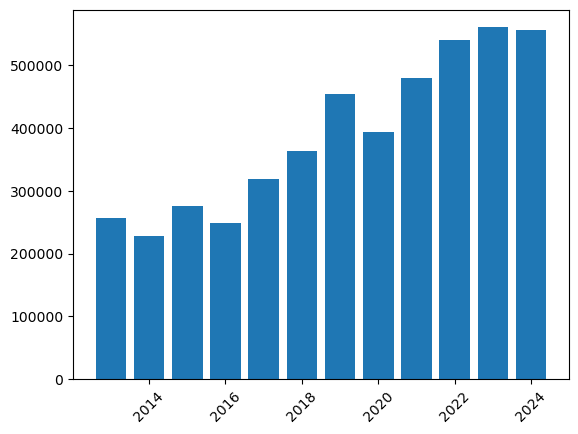

In [30]:
# plotting a bar chart
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

### Conclusion

After completing step six in the data transformation, I believe the end data frame is human readable, and free of NaN values. In total, six steps were taken to transform the data frame. In step one columns deemed to be unnecessary for the project were dropped from the data frame. In step two, filtering of the data frame was completed to narrow the scope of the data in the data frame, this was done for east of use and specificity of data related to the end analysis. In step three, I reviewed the new data frame for “NaN” values and discovered there were additional columns that could be dropped. This led to step four and five, which consisted of dropping additional columns, and reevaluating the “NaN” values to be dropped. In step six, I added additional columns “year” and “month” by converting the “period_end” column to a datetime and extracting the wanted data.

This project topic is for “self-use” so there are no regulatory or legal guidelines, however, there are regulatory and legal guidelines for the real-estate industry. This data was sourced from Kaggle.com and highly rated by peers who have downloaded the file. This led to the assumption that the data was credible and accurate. Using a publicly available data set for the project also ensures that the data set was retrieved ethically.

Regarding the risks and ethics of the data transformations for the project there could be several. When dropping columns there is a risk of valuable data being dropped or missed. The same could be done when dropping rows with “NaN” values.

# Milestone 3

### Importing HTML into a Data Frame

My original website was Weather Underground, but do to some formatting issues (which were mentioned on the grading of Milestone 1) I had to use a different webpage.

The website I’ve chosen is Wikipedia. Since this project will focus on a potential move, the weather will be a key factor. The website has a table of daily observations in weather for varying periods of time.

In [31]:
# the website used 
url = 'https://en.wikipedia.org/wiki/North_Carolina#Demographics'

In [32]:
# import libraries
from bs4 import BeautifulSoup
import pandas as pd

In [33]:
# read the downloaded html file
fd = open("Data/North Carolina - Wikipedia.html", "r", encoding = "utf-8")
# initializing the soup variable passing the file to the BeautifulSoup function
soup = BeautifulSoup(fd)
# closing the file
fd.close()

I originally intended to follow the previous assignment and use the beautiful soup method the extract the tables, but I instead decided to try a new method and use the built in 'pd.read_html()' function in pandas.

In [34]:
# alternative method
tables=pd.read_html("https://en.wikipedia.org/wiki/North_Carolina#Demographics", match = 'Climate data for North Carolina')

In [35]:
# the variable tables appears to be a list of dataframes
type(tables[0])

pandas.core.frame.DataFrame

In [36]:
# exploring how to access the dataframes within the 'tables' variable. Accidently got it on the first try
weather_df = tables[0]

In [37]:
weather_df.head(5)

Climate data for North Carolina                                         \
                            Month          Jan          Feb          Mar   
0             Record high °F (°C)      86 (30)      90 (32)     100 (38)   
1      Mean daily maximum °F (°C)   49.9 (9.9)  53.7 (12.1)  61.8 (16.6)   
2              Daily mean °F (°C)   39.2 (4.0)   42.3 (5.7)   49.5 (9.7)   
3      Mean daily minimum °F (°C)  28.4 (−2.0)  30.9 (−0.6)   37.2 (2.9)   
4              Record low °F (°C)    −34 (−37)    −31 (−35)    −29 (−34)   

                                                                    \
           Apr          May          Jun          Jul          Aug   
0     102 (39)     107 (42)     108 (42)     109 (43)     110 (43)   
1  71.0 (21.7)  78.1 (25.6)  85.2 (29.6)  88.1 (31.2)  86.8 (30.4)   
2  58.1 (14.5)  66.1 (18.9)  74.1 (23.4)  77.5 (25.3)  76.3 (24.6)   
3   45.2 (7.3)  54.0 (12.2)  63.0 (17.2)  66.8 (19.3)  65.8 (18.8)   
4      0 (−18)     13 (−11)      22 (−6)      30 (−1)      29 (−2)   

                                                                    
           Sep          Oct          Nov          Dec         Year  
0     109 (43)     102 (39)      90 (32)      87 (31)     110 (43)  
1  80.8 (27.1)  71.6 (22.0)  62.5 (16.9)  52.5 (11.4)  70.2 (21.2)  
2  69.9 (21.1)  59.4 (15.2)  50.4 (10.2)   41.7 (5.4)  58.7 (14.8)  
3  58.9 (14.9)   47.2 (8.4)   38.3 (3.5)  30.8 (−0.7)   47.2 (8.4)  
4      23 (−5)      5 (−15)    −22 (−30)    −33 (−36)    −34 (−37)

## Cleaning/Formatting Website Data

### Step 1: Replace Headers

In [38]:
# reviewing the columns and trying to figure out where 'Climate data for North Carolina' is coming from and why it's at the top of the data frame 
weather_df.columns

MultiIndex([('Climate data for North Carolina', 'Month'),
            ('Climate data for North Carolina',   'Jan'),
            ('Climate data for North Carolina',   'Feb'),
            ('Climate data for North Carolina',   'Mar'),
            ('Climate data for North Carolina',   'Apr'),
            ('Climate data for North Carolina',   'May'),
            ('Climate data for North Carolina',   'Jun'),
            ('Climate data for North Carolina',   'Jul'),
            ('Climate data for North Carolina',   'Aug'),
            ('Climate data for North Carolina',   'Sep'),
            ('Climate data for North Carolina',   'Oct'),
            ('Climate data for North Carolina',   'Nov'),
            ('Climate data for North Carolina',   'Dec'),
            ('Climate data for North Carolina',  'Year')],
           )

I discoverd that the string 'Climate data for North Carolina' that apepars to be a header is genereated from a multi-index level.

In [39]:
# dropping the multiindex leval creating the header 'Climate data for North Carolina'
weather_df.columns = weather_df.columns.droplevel()

In [40]:
# reviewing the first row of the data frame to verify the multi-index header was removed
weather_df

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Record high °F (°C),86 (30),90 (32),100 (38),102 (39),107 (42),108 (42),109 (43),110 (43),109 (43),102 (39),90 (32),87 (31),110 (43)
1,Mean daily maximum °F (°C),49.9 (9.9),53.7 (12.1),61.8 (16.6),71.0 (21.7),78.1 (25.6),85.2 (29.6),88.1 (31.2),86.8 (30.4),80.8 (27.1),71.6 (22.0),62.5 (16.9),52.5 (11.4),70.2 (21.2)
2,Daily mean °F (°C),39.2 (4.0),42.3 (5.7),49.5 (9.7),58.1 (14.5),66.1 (18.9),74.1 (23.4),77.5 (25.3),76.3 (24.6),69.9 (21.1),59.4 (15.2),50.4 (10.2),41.7 (5.4),58.7 (14.8)
3,Mean daily minimum °F (°C),28.4 (−2.0),30.9 (−0.6),37.2 (2.9),45.2 (7.3),54.0 (12.2),63.0 (17.2),66.8 (19.3),65.8 (18.8),58.9 (14.9),47.2 (8.4),38.3 (3.5),30.8 (−0.7),47.2 (8.4)
4,Record low °F (°C),−34 (−37),−31 (−35),−29 (−34),0 (−18),13 (−11),22 (−6),30 (−1),29 (−2),23 (−5),5 (−15),−22 (−30),−33 (−36),−34 (−37)
5,Average precipitation inches (mm),3.7 (94),3.5 (89),4.2 (110),3.5 (89),3.8 (97),4.3 (110),4.8 (120),4.7 (120),4.3 (110),3.3 (84),3.3 (84),3.5 (89),"46.9 (1,196)"
6,Average snowfall inches (cm),2.0 (5.1),1.4 (3.6),0.6 (1.5),0.1 (0.25),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.1 (0.25),0.8 (2.0),5 (12.7)
7,Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108]
8,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...


### Step 2: Update Header of Column One (Month)

I want to now update the name of column 'month', as previosuly it was a label for the row of months

In [41]:
# using the rename function to rename a specific column, 'weather values'
weather_df = weather_df.rename(columns = {'Month': 'Weather_Values'})
weather_df

,Weather_Values,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Record high °F (°C),86 (30),90 (32),100 (38),102 (39),107 (42),108 (42),109 (43),110 (43),109 (43),102 (39),90 (32),87 (31),110 (43)
1,Mean daily maximum °F (°C),49.9 (9.9),53.7 (12.1),61.8 (16.6),71.0 (21.7),78.1 (25.6),85.2 (29.6),88.1 (31.2),86.8 (30.4),80.8 (27.1),71.6 (22.0),62.5 (16.9),52.5 (11.4),70.2 (21.2)
2,Daily mean °F (°C),39.2 (4.0),42.3 (5.7),49.5 (9.7),58.1 (14.5),66.1 (18.9),74.1 (23.4),77.5 (25.3),76.3 (24.6),69.9 (21.1),59.4 (15.2),50.4 (10.2),41.7 (5.4),58.7 (14.8)
3,Mean daily minimum °F (°C),28.4 (−2.0),30.9 (−0.6),37.2 (2.9),45.2 (7.3),54.0 (12.2),63.0 (17.2),66.8 (19.3),65.8 (18.8),58.9 (14.9),47.2 (8.4),38.3 (3.5),30.8 (−0.7),47.2 (8.4)
4,Record low °F (°C),−34 (−37),−31 (−35),−29 (−34),0 (−18),13 (−11),22 (−6),30 (−1),29 (−2),23 (−5),5 (−15),−22 (−30),−33 (−36),−34 (−37)
5,Average precipitation inches (mm),3.7 (94),3.5 (89),4.2 (110),3.5 (89),3.8 (97),4.3 (110),4.8 (120),4.7 (120),4.3 (110),3.3 (84),3.3 (84),3.5 (89),"46.9 (1,196)"
6,Average snowfall inches (cm),2.0 (5.1),1.4 (3.6),0.6 (1.5),0.1 (0.25),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.1 (0.25),0.8 (2.0),5 (12.7)
7,Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108],Source 1: USA.com (averages)[108]
8,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...,Source 2: North Carolina State Climate Office ...


In step 2 I renamed the first column to better represnt the values associated with it. It went from 'month' to 'weather_values' to reflect that columns values. 

### Step 3: Remove Unnecessary Rows / Rows Incorrectly Imported

In [42]:
# using drop() to drop the rows specified in the square brackets 
weather_df = weather_df.drop([7,8])

In [43]:
# reviewing the updated data frame 
weather_df

,Weather_Values,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Record high °F (°C),86 (30),90 (32),100 (38),102 (39),107 (42),108 (42),109 (43),110 (43),109 (43),102 (39),90 (32),87 (31),110 (43)
1,Mean daily maximum °F (°C),49.9 (9.9),53.7 (12.1),61.8 (16.6),71.0 (21.7),78.1 (25.6),85.2 (29.6),88.1 (31.2),86.8 (30.4),80.8 (27.1),71.6 (22.0),62.5 (16.9),52.5 (11.4),70.2 (21.2)
2,Daily mean °F (°C),39.2 (4.0),42.3 (5.7),49.5 (9.7),58.1 (14.5),66.1 (18.9),74.1 (23.4),77.5 (25.3),76.3 (24.6),69.9 (21.1),59.4 (15.2),50.4 (10.2),41.7 (5.4),58.7 (14.8)
3,Mean daily minimum °F (°C),28.4 (−2.0),30.9 (−0.6),37.2 (2.9),45.2 (7.3),54.0 (12.2),63.0 (17.2),66.8 (19.3),65.8 (18.8),58.9 (14.9),47.2 (8.4),38.3 (3.5),30.8 (−0.7),47.2 (8.4)
4,Record low °F (°C),−34 (−37),−31 (−35),−29 (−34),0 (−18),13 (−11),22 (−6),30 (−1),29 (−2),23 (−5),5 (−15),−22 (−30),−33 (−36),−34 (−37)
5,Average precipitation inches (mm),3.7 (94),3.5 (89),4.2 (110),3.5 (89),3.8 (97),4.3 (110),4.8 (120),4.7 (120),4.3 (110),3.3 (84),3.3 (84),3.5 (89),"46.9 (1,196)"
6,Average snowfall inches (cm),2.0 (5.1),1.4 (3.6),0.6 (1.5),0.1 (0.25),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.0 (0.0),0.1 (0.25),0.8 (2.0),5 (12.7)


In step 3 I removed the rows 7 and 8 since they did add any additonal usefull information. 

### Step 4: Remove the Values Inside the Parenthesis

In [44]:
# importing additonal libraries
import re

In [45]:
# running the code to strip the values inside the parenthesis out including the parenthesis
weather_df['Jan'] = weather_df['Jan'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Feb'] = weather_df['Feb'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Mar'] = weather_df['Mar'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Apr'] = weather_df['Apr'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['May'] = weather_df['May'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Jun'] = weather_df['Jun'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Jul'] = weather_df['Jul'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Aug'] = weather_df['Aug'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Sep'] = weather_df['Sep'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Oct'] = weather_df['Oct'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Nov'] = weather_df['Nov'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Dec'] = weather_df['Dec'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Year'] = weather_df['Year'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()
weather_df['Weather_Values'] = weather_df['Weather_Values'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()

I would like to point out that I realize this is not an ideal way to execute this code as nearly all of it is repeated. However, I was unable to execute the code correctly using a loop or the apply function. In order to complete the project on time I chose to go ahead and execute the code in a manner that was ure to work. 

In [46]:
# reviewing the updated data frame
weather_df

,Weather_Values,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Record high °F,86,90,100,102,107,108,109,110,109,102,90,87,110
1,Mean daily maximum °F,49.9,53.7,61.8,71.0,78.1,85.2,88.1,86.8,80.8,71.6,62.5,52.5,70.2
2,Daily mean °F,39.2,42.3,49.5,58.1,66.1,74.1,77.5,76.3,69.9,59.4,50.4,41.7,58.7
3,Mean daily minimum °F,28.4,30.9,37.2,45.2,54.0,63.0,66.8,65.8,58.9,47.2,38.3,30.8,47.2
4,Record low °F,−34,−31,−29,0,13,22,30,29,23,5,−22,−33,−34
5,Average precipitation inches,3.7,3.5,4.2,3.5,3.8,4.3,4.8,4.7,4.3,3.3,3.3,3.5,46.9
6,Average snowfall inches,2.0,1.4,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,5


Removing that strings inside the parenthesis was done since the values were metric. Since the data frame is really for personal use removing the unused metric values makes the data frame cleaner to display.

### Step 5: Adding Additional Column(s)

In [47]:
# adding a column with name 'State' and values of 'North Carolina'
weather_df['State']='North Carolina'

In [48]:
# reviewing updated data frame
weather_df

,Weather_Values,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,State
0,Record high °F,86,90,100,102,107,108,109,110,109,102,90,87,110,North Carolina
1,Mean daily maximum °F,49.9,53.7,61.8,71.0,78.1,85.2,88.1,86.8,80.8,71.6,62.5,52.5,70.2,North Carolina
2,Daily mean °F,39.2,42.3,49.5,58.1,66.1,74.1,77.5,76.3,69.9,59.4,50.4,41.7,58.7,North Carolina
3,Mean daily minimum °F,28.4,30.9,37.2,45.2,54.0,63.0,66.8,65.8,58.9,47.2,38.3,30.8,47.2,North Carolina
4,Record low °F,−34,−31,−29,0,13,22,30,29,23,5,−22,−33,−34,North Carolina
5,Average precipitation inches,3.7,3.5,4.2,3.5,3.8,4.3,4.8,4.7,4.3,3.3,3.3,3.5,46.9,North Carolina
6,Average snowfall inches,2.0,1.4,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,5,North Carolina


In step 5, I've added an additional column titled 'State' with the values being 'North Carolina'. I added this column since all the data is for the state of North Carolina and it may be needed in future steps to join dataframes. 

The data source for this part of the project was a table from Wikipedia. The tables was imported into pandas using the read_html() pandas function and was transformed using the pandas library. The most obvious assumption is that the data source is reputable and accurate. The tables in Wikipedia were noted as coming from two different sources, USA.com and North Carolina State Climate Office. 

Once imported, there were several changes made to the data. I started by removing an unnecessary multi-indexed header, and then updating a header of a column to reflect the values of that column more accurately. I then dropped rows that did not provide any additional data for analysis. I followed this up by removing string values found in every column. These string values provided values in metric format which is unnecessary since the data will be used for personal use. In the final step of the transformations, I added a column reflecting the state where the weather data was attributed to. 

There appear to be no ethical, legal, or regulatory concerns regarding the data and transformations made. If there is an ethical issue, it may be dropping the metric conversions from the data frame. This would limit some people’s ability to use the data frame, but since this really is just for personal use, I don't see that as an isue.


# Milestone 4

### Connecting to an API/Pulling in the Data and Cleaning/Formatting

API Documentation Site - ''https://api.adzuna.com/v1/api'

Example Call - 'https://api.adzuna.com/v1/api/jobs/gb/search/1?app_id={YOUR_APP_ID}&app_key={YOUR_APP_KEY}'

In [49]:
# saving the api key and id to variables
api_key = 'fdba51d6408374845bd7044600ecdb02'
api_id = 'bba2ab7b'

In [50]:
# loading libraries
import urllib.request, urllib.parse, urllib.error
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import ssl

In [51]:
# saving the url to a variable and creatin ga function to call the api and return the desired data 
url = 'https://api.adzuna.com/v1/api/jobs/us/search/1?app_id=bba2ab7b&app_key=fdba51d6408374845bd7044600ecdb02&results_per_page=200&where=28105&distance=40'

# defined fucntion
def data_pull():
    response = requests.request("GET", url)
    data = response.json()
    # resturns the results
    return data['results']

# saves the returned results to a variable
nc_job = data_pull()

In [52]:
# revieing the type of nc_data
type(nc_job)

list

### Creating the Dataframe

In [53]:
# convertign the nested lsit to a data frame
df = pd.DataFrame(nc_job)

In [54]:
# reviewing the shape of the data frame
df.shape

(50, 17)

In [55]:
df.head(3)

,latitude,salary_max,company,category,id,longitude,salary_is_predicted,__CLASS__,location,description,title,adref,salary_min,redirect_url,created,contract_time,contract_type
0,35.114340,35573.08,{'__CLASS__': 'Adzuna::API::Response::Company'...,"{'tag': 'healthcare-nursing-jobs', '__CLASS__'...",4703673231,-80.693940,1,Adzuna::API::Response::Job,"{'display_name': 'Stallings, Union County', 'a...","Overview Registered Nurse, RN - Medical/Surgic...","Registered Nurse, RN - Medical/Surgical",eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNDcwMzY3MzIzMSIsI...,35573.08,https://www.adzuna.com/details/4703673231?utm_...,2024-05-22T14:33:26Z,part_time,NaN
1,35.232678,42001.56,"{'display_name': 'Novant Health', '__CLASS__':...",{'__CLASS__': 'Adzuna::API::Response::Category...,4684315844,-80.846082,1,Adzuna::API::Response::Job,"{'display_name': 'Charlotte, Mecklenburg Count...","Overview Schedule: 7days on, 7days off startin...",Registered Nurse Call team-Cath Lab,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiYXJvQzFxWWE3eEdvV...,42001.56,https://www.adzuna.com/details/4684315844?utm_...,2024-05-08T14:00:01Z,full_time,NaN
2,35.232678,52328.84,"{'display_name': 'Novant Health', '__CLASS__':...","{'label': 'Healthcare & Nursing Jobs', '__CLAS...",4684315798,-80.846082,1,Adzuna::API::Response::Job,"{'display_name': 'Charlotte, Mecklenburg Count...","Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Neurology Intermediate",eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNDY4NDMxNTc5OCIsI...,52328.84,https://www.adzuna.com/details/4684315798?utm_...,2024-05-08T14:00:00Z,full_time,NaN


### 1. Correcting the Values in 'Location' Column 

Using the json_normalize() function on the 'location' column separates the contents of the dictionary into additional columns in a new data frame.

In [56]:
# utilizing json_nomalize
df2 = pd.json_normalize(df['location'])

In [57]:
# reviewing df2 first three rows
df2.head(3)

,display_name,area,__CLASS__
0,"Stallings, Union County","[US, North Carolina, Union County, Stallings]",Adzuna::API::Response::Location
1,"Charlotte, Mecklenburg County","[US, North Carolina, Mecklenburg County, Charl...",Adzuna::API::Response::Location
2,"Charlotte, Mecklenburg County","[US, North Carolina, Mecklenburg County, Charl...",Adzuna::API::Response::Location


### 2. Dropping a Column 

Dropping unnecessary column from the expanded data frame.

In [58]:
# using drop to remove a column
df2.drop(['__CLASS__'],axis = 1, inplace = True)

### 3. Separating the 'area' Column

Using the explode() function separates the values in a list into separate columns

In [59]:
# using the explode() function on the 'area' column
df3 = df2.explode('area')

In [60]:
# reviewing the first 5 rows of df3
df3.head(5)

,display_name,area
0,"Stallings, Union County",US
0,"Stallings, Union County",North Carolina
0,"Stallings, Union County",Union County
0,"Stallings, Union County",Stallings
1,"Charlotte, Mecklenburg County",US


### 4. Concatenate Data Frames

In this step the 'display_name column' has the values split and the resulting data frame is then concatenated to create a new df3 data frame

In [61]:
# combining df3 with the result of splitting the 'display_name' column into multiple columns
df3 = pd.concat([df3,df3['display_name'].str.split(',', expand=True)], axis = 1)

In [62]:
# dropping th no longer needed 'display_name' column
df3.drop(['display_name'], axis = 1, inplace = True)

In [63]:
# reviewing first 5 rows
df3.head()

,area,0,1
0,US,Stallings,Union County
0,North Carolina,Stallings,Union County
0,Union County,Stallings,Union County
0,Stallings,Stallings,Union County
1,US,Charlotte,Mecklenburg County


### 5. Renaming Columns 

In this, the columns from the newly created df3 data frame are renamed. 

In [64]:
# rename columns
df3.rename(columns = {'area':'state', 0:'city',
                              1:'county'}, inplace = True)

In [65]:
# reviewing the renamed columns
df3.head()

,state,city,county
0,US,Stallings,Union County
0,North Carolina,Stallings,Union County
0,Union County,Stallings,Union County
0,Stallings,Stallings,Union County
1,US,Charlotte,Mecklenburg County


In [66]:
# replacing th values in the column 'State'
df3['state'] = 'North Carolina'

In [67]:
# resetting index
df3.reset_index(drop=True, inplace=True)

In [68]:
# reviewing first 5 rows
df3.head()

,state,city,county
0,North Carolina,Stallings,Union County
1,North Carolina,Stallings,Union County
2,North Carolina,Stallings,Union County
3,North Carolina,Stallings,Union County
4,North Carolina,Charlotte,Mecklenburg County


### 6. Reviewing Original Data Frame to Drop Additional Columns

I reviewed the original data frame to drop additional columns that were not required.

In [69]:
# reviewing columns 
df.columns

Index(['latitude', 'salary_max', 'company', 'category', 'id', 'longitude',
       'salary_is_predicted', '__CLASS__', 'location', 'description', 'title',
       'adref', 'salary_min', 'redirect_url', 'created', 'contract_time',
       'contract_type'],
      dtype='object')

In [70]:
# dropping columns not needed
df1 = df.drop(['longitude', 'latitude', 'adref', '__CLASS__', 'salary_is_predicted', 'location','category','redirect_url', 'company'], axis = 1)

In [71]:
# reviewing first 5 rows
df1.head()

,salary_max,id,description,title,salary_min,created,contract_time,contract_type
0,35573.08,4703673231,"Overview Registered Nurse, RN - Medical/Surgic...","Registered Nurse, RN - Medical/Surgical",35573.08,2024-05-22T14:33:26Z,part_time,NaN
1,42001.56,4684315844,"Overview Schedule: 7days on, 7days off startin...",Registered Nurse Call team-Cath Lab,42001.56,2024-05-08T14:00:01Z,full_time,NaN
2,52328.84,4684315798,"Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Neurology Intermediate",52328.84,2024-05-08T14:00:00Z,full_time,NaN
3,36019.46,4702432773,"Overview Sign-On bonus available up to $20,000...",Registered Nurse - Preop/PACU,36019.46,2024-05-21T14:25:13Z,full_time,NaN
4,40512.10,4624381132,"Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Medical/Surgical",40512.10,2024-03-26T15:22:05Z,full_time,NaN


### 7. Correcting the Company Column

Transformed the 'company' column to a data frame, dropped and renamed the features

In [72]:
# utilizing json_nomalize
df4 = pd.json_normalize(df['company'])

In [73]:
# dropping additional columns 
df4.drop(['__CLASS__'], axis = 1, inplace = True)

In [74]:
# renaming the column
df4.rename(columns = {'display_name':'Company'}, inplace = True)

In [75]:
# reviewing the first 5 rows
df4.head()

,Company
0,Novant Health
1,Novant Health
2,Novant Health
3,Novant Health
4,Novant Health


### 8. Creating the Final Data Frame

Made final adjustments to the data frame to finalize.

In [76]:
# concatenating df3 and df4 along columns
final_df = pd.concat([df1, df3, df4], axis=1)

In [77]:
# dropping extra rows
final_df.drop(final_df.index[50:], inplace = True)

In [78]:
# reviewing the final design
final_df.head(5)

,salary_max,id,description,title,salary_min,created,contract_time,contract_type,state,city,county,Company
0,35573.08,4703673231,"Overview Registered Nurse, RN - Medical/Surgic...","Registered Nurse, RN - Medical/Surgical",35573.08,2024-05-22T14:33:26Z,part_time,NaN,North Carolina,Stallings,Union County,Novant Health
1,42001.56,4684315844,"Overview Schedule: 7days on, 7days off startin...",Registered Nurse Call team-Cath Lab,42001.56,2024-05-08T14:00:01Z,full_time,NaN,North Carolina,Stallings,Union County,Novant Health
2,52328.84,4684315798,"Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Neurology Intermediate",52328.84,2024-05-08T14:00:00Z,full_time,NaN,North Carolina,Stallings,Union County,Novant Health
3,36019.46,4702432773,"Overview Sign-On bonus available up to $20,000...",Registered Nurse - Preop/PACU,36019.46,2024-05-21T14:25:13Z,full_time,NaN,North Carolina,Stallings,Union County,Novant Health
4,40512.10,4624381132,"Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Medical/Surgical",40512.10,2024-03-26T15:22:05Z,full_time,NaN,North Carolina,Charlotte,Mecklenburg County,Novant Health


The data source for this part of the project was an API from the government census site. I found the census api very difficult to use and the response data hard to comprehend. I opted for a back up API that involves job data.  

Once the data was pulled from the API, several changes needed to be made. The 'company' and 'location' column values were not formatted correctly. I utilized the json_normalize() and explode() functions to manipulate and transform the columns. Once I had the columns formatted, I used the concat() function to combine various data frames after they had been corrected and transformed. 

There appear to be no ethical, legal, or regulatory concerns regarding the data and transformations made. 

# Milestone 5

### Merging the Data and Storing in a Database/Visualizing Data

Below are the final data frames, I re-assigned the data frames to new variables so I would not get confused or mix up the names from the above milestones.

**NOTE** - Any cell that appears not to be run is because they generated errors since they have already been run and database and tables creaeted. I have run them then cleared the output. 

In [79]:
# re-assinging data frame to new variable and reviewing first 5 rows
city_df = char_df
city_df.head(3)

,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,median_sale_price,...,avg_sale_to_list_mom,sold_above_list,sold_above_list_mom,price_drops,price_drops_mom,parent_metro_region,parent_metro_region_metro_code,last_updated,year,month
252298,2021-07-01,2021-07-01,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,357000.0,...,0.003396,0.638814,0.001568,0.193569,0.035709,"Charlotte, NC",16740,2024-03-10 14:36:40,2021,7
370324,2013-05-01,2013-05-01,30,"Charlotte, NC",Charlotte,North Carolina,NC,All Residential,-1,175000.0,...,0.002654,0.200752,0.005399,0.130988,0.017814,"Charlotte, NC",16740,2024-03-10 14:36:40,2013,5
558147,2016-05-01,2016-05-01,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,202000.0,...,0.005557,0.277943,0.016761,0.134222,0.019793,"Charlotte, NC",16740,2024-03-10 14:36:40,2016,5


In [80]:
# re-assinging data frame to new variable and reviewing first 5 rows
weather_df = weather_df
weather_df.head(3)

,Weather_Values,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,State
0,Record high °F,86,90,100,102,107,108,109,110,109,102,90,87,110,North Carolina
1,Mean daily maximum °F,49.9,53.7,61.8,71.0,78.1,85.2,88.1,86.8,80.8,71.6,62.5,52.5,70.2,North Carolina
2,Daily mean °F,39.2,42.3,49.5,58.1,66.1,74.1,77.5,76.3,69.9,59.4,50.4,41.7,58.7,North Carolina


In [81]:
# re-assinging data frame to new variable and reviewing first 5 rows
jobs_df = final_df
jobs_df.head(3)

,salary_max,id,description,title,salary_min,created,contract_time,contract_type,state,city,county,Company
0,35573.08,4703673231,"Overview Registered Nurse, RN - Medical/Surgic...","Registered Nurse, RN - Medical/Surgical",35573.08,2024-05-22T14:33:26Z,part_time,NaN,North Carolina,Stallings,Union County,Novant Health
1,42001.56,4684315844,"Overview Schedule: 7days on, 7days off startin...",Registered Nurse Call team-Cath Lab,42001.56,2024-05-08T14:00:01Z,full_time,NaN,North Carolina,Stallings,Union County,Novant Health
2,52328.84,4684315798,"Overview Sign-on bonus available up to $30,000...","Registered Nurse, RN - Neurology Intermediate",52328.84,2024-05-08T14:00:00Z,full_time,NaN,North Carolina,Stallings,Union County,Novant Health


### 1. Creating the Database

In [82]:
# loading libraries
import sqlite3

In [83]:
# creating a variable to hold the database name
file = "final.db"

In [84]:
# creating the database (saved in directory of notebook)
try: 
  conn = sqlite3.connect(file) 
  print("Database Sqlite3.db formed.") 
except: 
  print("Database Sqlite3.db not formed.")

Database Sqlite3.db formed.


### 2. Saving the Data Frames to the Data Base

In [85]:
conn = sqlite3.connect('final.db')

In [ ]:
# saving the data frames to the data base file
city_df.to_sql(name = 'city_df', con = conn)

In [ ]:
# saving the data frames to the data base file
weather_df.to_sql(name = 'weather_df', con = conn)

In [ ]:
# saving the data frames to the data base file
jobs_df.to_sql(name = 'jobs_df', con = conn)

In [91]:
# verifying a data frame has been saved 
cursor = conn.cursor()
rows = cursor.execute('SELECT * FROM weather_df')
for row in rows:
    print(row)

(0, 'Record high °F', '86', '90', '100', '102', '107', '108', '109', '110', '109', '102', '90', '87', '110', 'North Carolina')
(1, 'Mean daily maximum °F', '49.9', '53.7', '61.8', '71.0', '78.1', '85.2', '88.1', '86.8', '80.8', '71.6', '62.5', '52.5', '70.2', 'North Carolina')
(2, 'Daily mean °F', '39.2', '42.3', '49.5', '58.1', '66.1', '74.1', '77.5', '76.3', '69.9', '59.4', '50.4', '41.7', '58.7', 'North Carolina')
(3, 'Mean daily minimum °F', '28.4', '30.9', '37.2', '45.2', '54.0', '63.0', '66.8', '65.8', '58.9', '47.2', '38.3', '30.8', '47.2', 'North Carolina')
(4, 'Record low °F', '−34', '−31', '−29', '0', '13', '22', '30', '29', '23', '5', '−22', '−33', '−34', 'North Carolina')
(5, 'Average precipitation inches', '3.7', '3.5', '4.2', '3.5', '3.8', '4.3', '4.8', '4.7', '4.3', '3.3', '3.3', '3.5', '46.9', 'North Carolina')
(6, 'Average snowfall inches', '2.0', '1.4', '0.6', '0.1', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.1', '0.8', '5', 'North Carolina')


In [92]:
# closing connection
conn.close()

### 3. Merge Tables

In [93]:
# creating the conenction to the database file
conn = sqlite3.connect(file)

In [94]:
# creating the cursor object
cur = conn.cursor()

In [ ]:
# defining a function to merge two tables
def merged():
    cur.execute('CREATE TABLE table3 AS SELECT * FROM city_df INNER JOIN weather_df ON city_df.state = weather_df.state')
    for line in cur.fetchall():
        print(line)
merged()

In [ ]:
# defining a function to merge the final table into the previosuly merged tables
def final_merged():
    cur.execute('CREATE TABLE table4 AS SELECT * FROM table3 INNER JOIN jobs_df ON table3.state = jobs_df.state')
    for line in cur.fetchall():
        print(line)
final_merged()

In [97]:
# closing the database connection
conn.close()

### 4. Return Final Merged Table from Data Base

In this step, I reconnected to the database file where the final merged table was stored; 'table4'. I selected all data of table4 and saved it to the 'df' variable using pandas function 'pd.read_sql_query()'. This was an easy way for me to access all data and create me five visualizations. 

In [98]:
# Read sqlite query results into a pandas DataFrame
conn = sqlite3.connect(file)
df = pd.read_sql_query("SELECT * from table4", conn)

# Verify that result of SQL query is stored in the dataframe
df.head(5)

# close connection
conn.close()

In [99]:
#reviewing the first 5 rows of the joined data frame 
df.head(5)

,index,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,...,contract_time,id,created,title,description,contract_type,state:2,city:1,county,Company
0,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4620625727,2024-03-22T16:56:29Z,Registered Nurse - Women's Services,Overview Novant Health is seeking a Women's Se...,None,North Carolina,Marvin,Union County,Novant Health
1,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4684315819,2024-05-08T14:00:00Z,The Perfect Match- Registered Nurse,"Overview Sign-on bonus available up to $15,000...",None,North Carolina,Marvin,Union County,Novant Health
2,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4637563539,2024-04-05T12:01:47Z,Registered Nurse - ADT,"Overview Sign-on bonus available up to $15,000...",None,North Carolina,Marvin,Union County,Novant Health
3,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,None,4697835457,2024-05-17T18:00:16Z,Registered Nurse - Intermediate,Overview Novant Health is seeking an Intermedi...,None,North Carolina,Marvin,Union County,Novant Health
4,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4583702701,2024-02-27T10:12:24Z,"Registered Nurse, RN - Orthopedic Specialty Care","Overview Sign-on bonus available up to $30,000...",None,North Carolina,Charlotte,Mecklenburg County,Novant Health


In [100]:
# reviewing the columns of the joined data frame
df.columns

Index(['index', 'period_begin', 'period_end', 'period_duration', 'region',
       'city', 'state', 'state_code', 'property_type', 'property_type_id',
       'median_sale_price', 'median_sale_price_mom', 'median_list_price',
       'median_list_price_mom', 'median_ppsf', 'median_ppsf_mom',
       'median_list_ppsf', 'median_list_ppsf_mom', 'homes_sold',
       'homes_sold_mom', 'new_listings', 'new_listings_mom', 'inventory',
       'inventory_mom', 'months_of_supply', 'months_of_supply_mom',
       'median_days_on_market', 'median_days_on_market_mom',
       'avg_sale_to_list', 'avg_sale_to_list_mom', 'sold_above_list',
       'sold_above_list_mom', 'price_drops', 'price_drops_mom',
       'parent_metro_region', 'parent_metro_region_metro_code', 'last_updated',
       'year', 'month', 'index:1', 'Weather_Values', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year:1',
       'State:1', 'index:2', 'salary_min', 'salary_max', 'contract_time', 

### 5. Creating Visualizations of the Joined Data

In [101]:
# import library to supress 'future-warnings'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Visualization 1

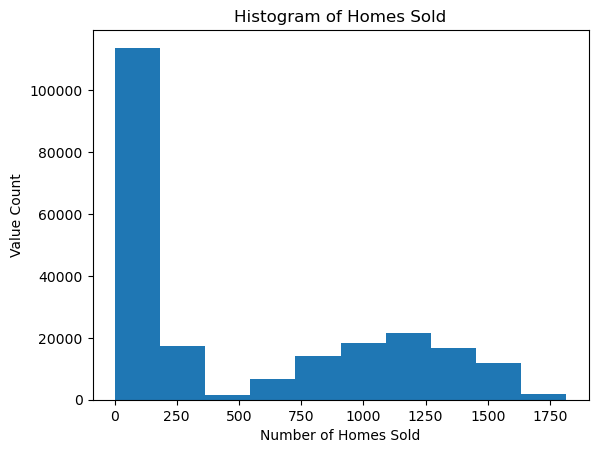

In [102]:
# plotting the histogram of median sale price 
plt.hist(df["homes_sold"]) 
plt.xlabel('Number of Homes Sold')
plt.ylabel('Value Count')
plt.title('Histogram of Homes Sold')
plt.show() 

### Visualization 2

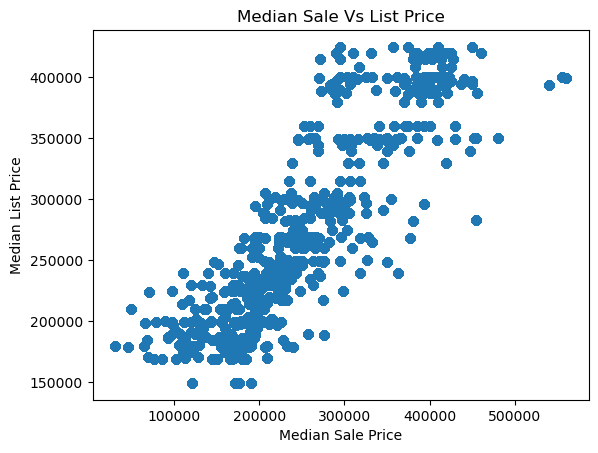

In [103]:
# plotting median list price vs sale price
plt.scatter(df['median_sale_price'], df['median_list_price'])
plt.xlabel('Median Sale Price')
plt.ylabel('Median List Price')
plt.title('Median Sale Vs List Price')
plt.show()

### Visualization 3

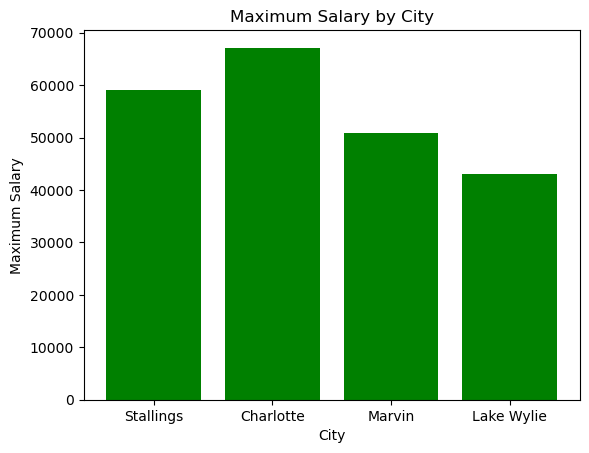

In [104]:
# plotting the max salaries by city
plt.bar(jobs_df['city'], jobs_df['salary_max'], color = 'green')
plt.xlabel('City')
plt.ylabel('Maximum Salary')
plt.title('Maximum Salary by City')
plt.show()

### Visualization 4

In [105]:
# impoting additonal libraries
import seaborn as sns

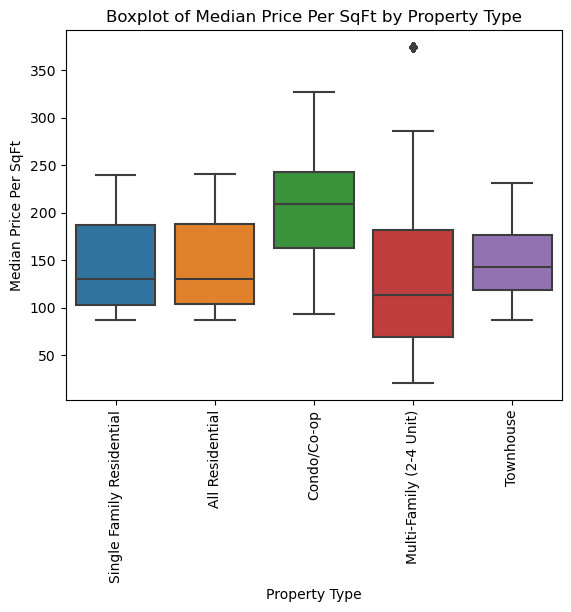

In [106]:
# using the seaborn library to create a boxplot 
sns.boxplot(x = df['property_type'], y = df['median_ppsf'])
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Median Price Per SqFt')
plt.title('Boxplot of Median Price Per SqFt by Property Type')
plt.show()


### Visualization 5

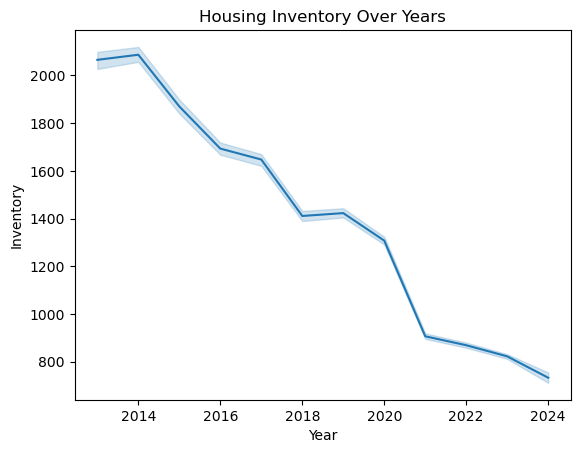

In [107]:
# plotting a line plot of available housing inventory over time
sns.lineplot(x = df['year'], y = df['inventory'])
plt.xlabel('Year')
plt.ylabel('Inventory')
plt.title('Housing Inventory Over Years')
plt.show()

### 6. Final Data Set

In [108]:
df

,index,period_begin,period_end,period_duration,region,city,state,state_code,property_type,property_type_id,...,contract_time,id,created,title,description,contract_type,state:2,city:1,county,Company
0,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4620625727,2024-03-22T16:56:29Z,Registered Nurse - Women's Services,Overview Novant Health is seeking a Women's Se...,None,North Carolina,Marvin,Union County,Novant Health
1,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4684315819,2024-05-08T14:00:00Z,The Perfect Match- Registered Nurse,"Overview Sign-on bonus available up to $15,000...",None,North Carolina,Marvin,Union County,Novant Health
2,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4637563539,2024-04-05T12:01:47Z,Registered Nurse - ADT,"Overview Sign-on bonus available up to $15,000...",None,North Carolina,Marvin,Union County,Novant Health
3,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,None,4697835457,2024-05-17T18:00:16Z,Registered Nurse - Intermediate,Overview Novant Health is seeking an Intermedi...,None,North Carolina,Marvin,Union County,Novant Health
4,252298,2021-07-01,2021-07-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Single Family Residential,6,...,full_time,4583702701,2024-02-27T10:12:24Z,"Registered Nurse, RN - Orthopedic Specialty Care","Overview Sign-on bonus available up to $30,000...",None,North Carolina,Charlotte,Mecklenburg County,Novant Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223645,5238669,2013-03-01,2013-03-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,...,full_time,4635178442,2024-04-03T15:31:51Z,Registered Nurse,Overview The Registered Nurse serves as a lead...,None,North Carolina,Stallings,Union County,Novant Health
223646,5238669,2013-03-01,2013-03-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,...,full_time,4632219562,2024-04-01T17:58:50Z,Registered Nurse,Overview Novant Health is seeking a Registered...,None,North Carolina,Stallings,Union County,Novant Health
223647,5238669,2013-03-01,2013-03-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,...,part_time,4553119078,2024-02-01T12:26:51Z,Registered Nurse - Progressive Care,"Overview Sign-on bonus available up to $15,000...",None,North Carolina,Stallings,Union County,Novant Health
223648,5238669,2013-03-01,2013-03-01 00:00:00,30,"Charlotte, NC",Charlotte,North Carolina,NC,Multi-Family (2-4 Unit),4,...,None,4684539575,2024-05-08T15:49:51Z,Registered Nurse - Medical Surgical,Overview The Registered Nurse serves as a lead...,None,North Carolina,Charlotte,Mecklenburg County,Novant Health


## Final Summary

This project has been a great opportunity to learn the steps required for successful data preparation. Through the many steps required in the project I have learned a great deal about data preparation as well as data wrangling. This project required accessing and pulling data in three different ways; a flat file, such as a csv file, a webpage with table like data, and accessing an API.

It would be hard to list out all the different things that I have learned through this course and project  There have been so many different functions, tools, and libraries that I have needed to use to complete assignments and projects throughout the course that I had never used prior. Sticking to some general concepts though may be a better approach to summarize what I have learned in this course.

Prior to this course I had limited experience pulling table data from an html site. It was great to find ways to interact and pull data from an html site or file using some of the pandas built ins. The easiest way I found to work with the html page was by using the “read_html()” function. Using the built-in pandas function made pulling tables from the html page simple.
 
The most difficult part of this course, for me, was learning to use the various APIs. Every API is different and offers its own documentation on how to make a call as well as how that API returns data. Once the API is called it can be difficult to navigate the returned response. I had trouble pulling the data I needed out of the returned response initially but learning about multi-indexing I was able to pull the data into a data frame and utilize it for my project
.
 Regarding ethical concerns with the project and data cleansing performed. The project itself does not pose any ethical issues as it was meant for my own personal use to review different aspects of a city I am interested in relocating to. The data cleansing portion of the project also did not appear to have any ethical implications. The only issue that seemed apparent was dropping the Celsius values from the weather data. This prevents others unfamiliar with the imperial standards from easily comprehending the weather data values.


**Word Count - 381**